In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
bos.shape

(506, 13)

In [8]:
bos['MEDV'] = boston.target

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
bos.shape

(506, 14)

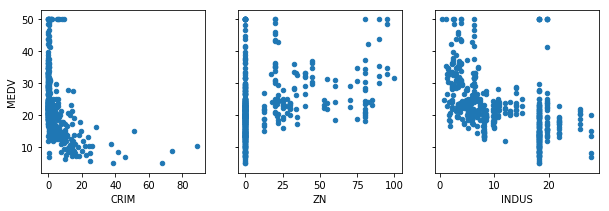

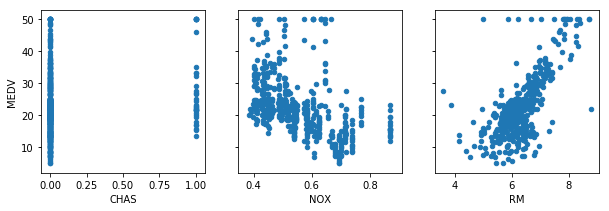

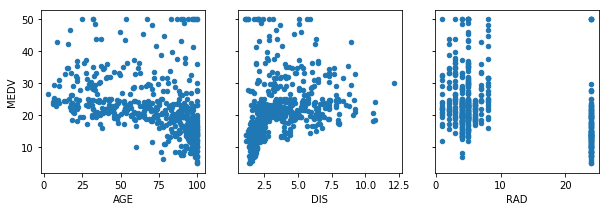

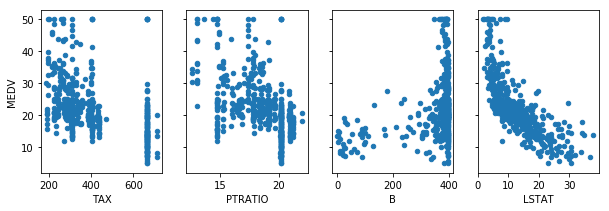

In [11]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1,3, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='MEDV', ax=axs[0], figsize=(10, 3))
bos.plot(kind='scatter', x='ZN', y='MEDV', ax=axs[1])
bos.plot(kind='scatter', x='INDUS', y='MEDV', ax=axs[2])
fig, axs = plt.subplots(1,3, sharey=True)
bos.plot(kind='scatter', x='CHAS', y='MEDV', ax=axs[0], figsize=(10, 3))
bos.plot(kind='scatter', x='NOX', y='MEDV', ax=axs[1])
bos.plot(kind='scatter', x='RM', y='MEDV', ax=axs[2])
fig, axs = plt.subplots(1,3, sharey=True)
bos.plot(kind='scatter', x='AGE', y='MEDV', ax=axs[0], figsize=(10, 3))
bos.plot(kind='scatter', x='DIS', y='MEDV', ax=axs[1])
bos.plot(kind='scatter', x='RAD', y='MEDV', ax=axs[2])
fig, axs = plt.subplots(1,4, sharey=True)
bos.plot(kind='scatter', x='TAX', y='MEDV', ax=axs[0], figsize=(10, 3))
bos.plot(kind='scatter', x='PTRATIO', y='MEDV', ax=axs[1])
bos.plot(kind='scatter', x='B', y='MEDV', ax=axs[2])
bos.plot(kind='scatter', x='LSTAT', y='MEDV', ax=axs[3], figsize=(10, 3))

In [12]:
x = bos.drop('MEDV', axis=1)
y = bos['MEDV']

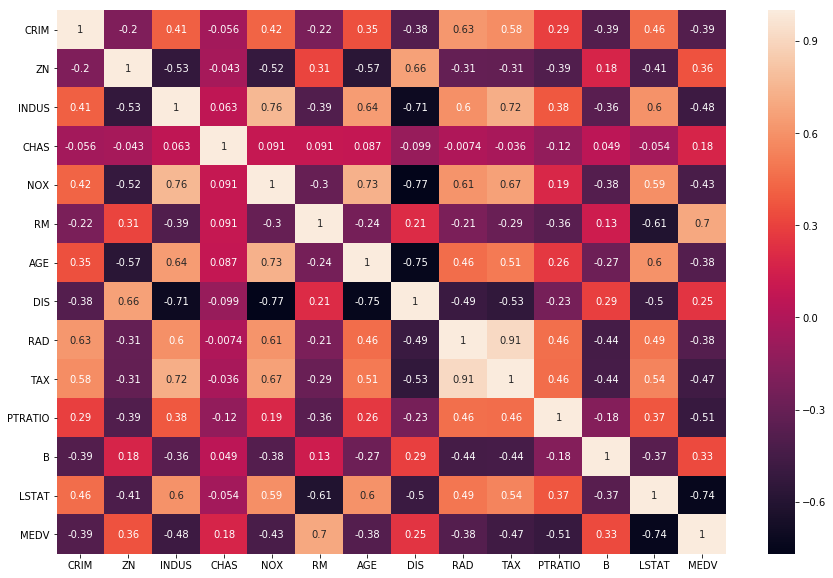

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(bos.corr(), annot=True)

- Here almost all attributes are **showing relationship** with the output value price(MEDV). 
- **CHAS** is having only 2 values so showing very less correlation. RAD and DIS also have less relationship with the output.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

print(lm.intercept_)
print(lm.coef_)

37.16254129502888
[-9.32979504e-02  3.11368143e-02 -1.81754255e-02  3.19555762e+00
 -1.51042926e+01  3.50102142e+00  1.89769212e-02 -1.26552555e+00
  3.22156319e-01 -1.09456764e-02 -1.08963451e+00  1.25396786e-02
 -6.07618971e-01]


In [16]:
pred_test = lm.predict(x_test)

In [17]:
train_score = lm.score(x_train, y_train)
train_score

0.7360587999246775

In [18]:
test_score = lm.score(x_test, y_test)
test_score

0.7330247212691907

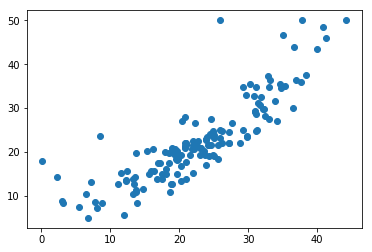

In [19]:
plt.scatter(pred_test, y_test)

- Model is giving **good** predictions with train data and almost same results are coming with the test data.
- Hence it is **generalizing well** to the test data.

In [20]:
x_new = pd.DataFrame({'CRIM': [bos.CRIM.min(), bos.CRIM.max()], \
    'ZN': [bos.ZN.min(), bos.ZN.max()], 'INDUS': [bos.INDUS.min(), \
    bos.INDUS.max()], 'CHAS': [bos.CHAS.min(), bos.CHAS.max()], 'NOX': [bos.NOX.min(), bos.NOX.max()], \
    'RM': [bos.RM.min(), bos.RM.max()], 'AGE': [bos.AGE.min(), bos.AGE.max()], 'DIS': [bos.DIS.min(), \
    bos.DIS.max()], 'RAD': [bos.RAD.min(), bos.RAD.max()], 'TAX': [bos.TAX.min(), bos.TAX.max()], \
    'PTRATIO': [bos.PTRATIO.min(), bos.PTRATIO.max()], 'B': [bos.B.min(), bos.B.max()],\
    'LSTAT': [bos.LSTAT.min(), bos.LSTAT.max()]})

In [21]:
x_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
1,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


In [22]:
preds = lm.predict(x_new)
preds

array([25.92982294, -3.31615454])

In [23]:
import statsmodels.formula.api as smf

- Using **OLS model** for prediction.

In [24]:
lm = smf.ols(formula='MEDV ~ CRIM+ ZN+ INDUS+ CHAS+ NOX+ RM+ AGE+ DIS+ RAD+ TAX+ PTRATIO+ B+ LSTAT',data=bos).fit()
print(lm.conf_int())
lm.summary()

                   0          1
Intercept  26.432226  46.486751
CRIM       -0.172584  -0.043438
ZN          0.019449   0.073392
INDUS      -0.100268   0.141385
CHAS        0.993904   4.379563
NOX       -25.271634 -10.261589
RM          2.988727   4.631004
AGE        -0.025262   0.026647
DIS        -1.867455  -1.083679
RAD         0.175692   0.436407
TAX        -0.019723  -0.004946
PTRATIO    -1.209795  -0.695699
B           0.004034   0.014589
LSTAT      -0.624404  -0.425113


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 20 May 2019   Prob (F-statistic):          6.72e-135
Time:                        01:39:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
y_pred = lm.predict(x)

In [26]:
math.sqrt(mean_squared_error(y_pred, y))

4.679191295697281

In [27]:
x.shape

(506, 13)

In [28]:
pd.DataFrame({'pred':lm.predict(x), 'orig':y}).head(10)

,pred,orig
0,30.003843,24.0
1,25.025562,21.6
2,30.567597,34.7
3,28.607036,33.4
4,27.943524,36.2
5,25.256284,28.7
6,23.001808,22.9
7,19.535988,27.1
8,11.523637,16.5
9,18.920262,18.9


**Here** 
- So for a given value of all other fields, an increase of 1 unit in **RM** is associated with an **increase in price of 3.8099 units**.
- Similarly for a given value of all other fields, an increase of 1 unit in **LSTAT** is associated with a **decrease in price of -0.5248 units**.

- The **P-values** for **all attributes** except INDUS and AGE are lower then 0.05 that means there is a good assoication between **MEGV (price)** and these attributes. So we **reject the NULL hypothesis** for them.
- **INDUS and AGE** have high P-values thus irrelevant to MEGV(price). So we fail to reject the NULL hypothesis for them.

- The **R squared** value for this model is also **high 74.1%** so this model provides a better fit to the data.

